### Coulomb: Look at Electric Field lines around Charges/ Spheres
#### phys1410, prof. Hyde, Winter 2020

In [3]:
from __future__ import division

import math
import scipy.integrate
import os
import matplotlib.pylab as plt
import numpy as np
import argparse
#import animation
import matplotlib.animation as animation
from scipy.integrate import solve_ivp #solve an initial value problem for a system of ODEs
from IPython.display import HTML
#from celluloid import Camera
from matplotlib.animation import FuncAnimation
#from vpython import *
from scipy.constants import e, epsilon_0
from scipy.integrate import ode as ode
from matplotlib import cm
from itertools import product
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.patches import Circle

%matplotlib inline

### Electric Fields

In [67]:
multipole = 0
#The multipole is selected as a power of 2 with multipole above 
#(0=monopole, 1=dipole, 2=quadrupole, 3=octupole, 4=hexadecapole etc.)
def E(q, r0, x, y):
    """Return the electric field vector E=(Ex,Ey) due to charge q at r0."""
    den = np.hypot(x-r0[0], y-r0[1])**3
    return q * (x - r0[0]) / den, q * (y - r0[1]) / den

# Grid of x, y points
nx, ny = 64, 64
x = np.linspace(-2, 2, nx)
y = np.linspace(-2, 2, ny)
X, Y = np.meshgrid(x, y)

# Create a multipole with nq charges of alternating sign, equally spaced
# on the unit circle.
nq = 2**int(multipole)
chargesmp = []
for i in range(nq):
    q = i%2 * 2 - 1
    chargesmp.append((q, (np.cos(2*np.pi*i/nq), np.sin(2*np.pi*i/nq))))

# Electric field vector, E=(Ex, Ey), as separate components
Ex, Ey = np.zeros((ny, nx)), np.zeros((ny, nx))
for chargemp in chargesmp:
    ex, ey = E(*chargemp, x=X, y=Y)
    Ex += ex
    Ey += ey

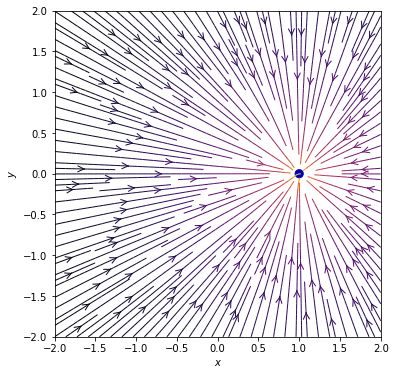

In [68]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)

# Plot the streamlines with an appropriate colormap and arrow style
color = 2 * np.log(np.hypot(Ex, Ey))
ax.streamplot(x, y, Ex, Ey, color=color, linewidth=1, cmap=plt.cm.inferno,
              density=2, arrowstyle='->', arrowsize=1.5)

# Add filled circles for the charges themselves
charge_colors = {True: '#aa0000', False: '#0000aa'}
for q, pos in chargesmp:
    ax.add_artist(Circle(pos, 0.05, color=charge_colors[q>0]))

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_xlim(-2,2)
ax.set_ylim(-2,2)
ax.set_aspect('equal')
plt.show()

### A positively charged sphere is placed at 0,0 and the electric potential and electric field is calculated. 

In [63]:
eps0 = 8.85*10**(-12) # permittivity of vacuum = electric constant
rho_sp = 0.5          # radius of the sphere
Q_sp = 1.0*10**(-9)   # charge of the sphere

In [64]:
Ndata = 1000
rs = np.linspace(10**(-12),10,Ndata) #sphere
zs = np.linspace(-10,10,Ndata)
RR,ZZ = np.meshgrid(rs,zs)

def funcV(rsp,q,x,y):
    rho = (x**2+y**2)**0.5
    v = q/(4*np.pi*eps0*(x**2+y**2)**0.5)
    vsp =q/(4*np.pi*eps0*rho_sp)
    v[np.where(rho<rsp)] = vsp
    return v
def funcE(rsp,q,x,y):
    rho = (x**2+y**2)**0.5
    e = q/(4*np.pi*eps0*(x**2+y**2))
    esp = 0
    e[np.where(rho<rsp)] = esp
    return e
    
VV = funcV(rho_sp, Q_sp, RR, ZZ)
EE = funcE(rho_sp, Q_sp, RR, ZZ)

In [65]:
VVlog = VV.copy()
VVlog = np.log10(VV)
EElog = EE.copy()
EElog[np.where(EElog<10**(-12))] = 10**(-12)
EElog = np.log10(EElog)

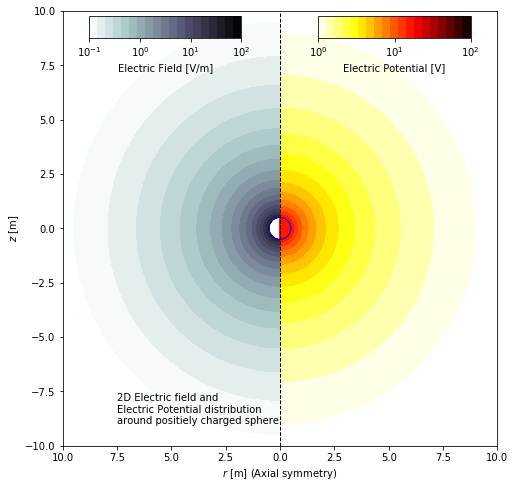

In [66]:
fig = plt.figure(facecolor='w', figsize=(8,8))
ax = fig.add_subplot(1, 1, 1)
ax.set_aspect('equal')

# Right side of the figure which shows V: electric potential
cmin1 = 0
cmax1 = 2
lvls1 = np.linspace(cmin1, cmax1, 20)
cont1 = ax.contourf(RR, ZZ, VVlog, levels=lvls1, cmap='hot_r')
axin1 = inset_axes(ax, width='35%', height='5%', loc='upper right',
                  bbox_to_anchor=(-0.05,0,1,1), bbox_transform=ax.transAxes)
cbar1 = plt.colorbar(cont1, cax=axin1, orientation='horizontal')
cbar1.set_label('Electric Potential [V]')
cbar1.set_ticks([np.arange(cmin1, cmax1+0.001)])
cbar1.set_ticklabels([ "$10^{%d}$"%(int(x)) for x in cbar1.get_ticks()])

# Left side of the figure which shows E: electric field
cmin2 = -1
cmax2 = 2
lvls2 = np.linspace(cmin2, cmax2, 20)
cont2 = ax.contourf(-RR, ZZ, EElog, levels=lvls2, cmap='bone_r')
axin2 = inset_axes(ax, width='35%', height='5%', loc='upper left',
                  bbox_to_anchor=(+0.05,0,1,1), bbox_transform=ax.transAxes)
cbar2 = plt.colorbar(cont2, cax=axin2, orientation='horizontal')
cbar2.set_label('Electric Field [V/m]')
cbar2.set_ticks([np.arange(cmin2, cmax2+0.001)])
cbar2.set_ticklabels([ "$10^{%d}$"%(int(x)) for x in cbar2.get_ticks()])

# Additional data 1: a line to separate left side and right side
ax.plot([0,0], [-10,10], 'k--', lw=1)

# Additional data 2: shape of the spere
tsp = np.linspace(0, 2*np.pi, 100)
xsp = rho_sp*np.cos(tsp)
ysp = rho_sp*np.sin(tsp)
ax.plot(xsp,ysp,'b-',lw=1)

# Additional data 3: text
tx =  "2D Electric field and"+"\n"
tx += "Electric Potential distribution"+"\n"
tx += "around positiely charged sphere"
ax.text(-7.5, -9, tx)

# Set ticks and labels
xtks = ax.get_xticks()
ax.set_xticks(xtks)
ax.set_xticklabels(np.abs(xtks))
ax.set_xlabel('$r$ [m] (Axial symmetry)')
ax.set_ylabel('$z$ [m]')

# Save figure as png file
#plt.savefig("two_contour_two_colorbar_in_one_figure.png",
#            bbox_inches='tight', pad_inches=0.05, dpi=150)
plt.show()

#### The right side of the figure is electric potential and the left side is electric field.

### Electric Field and Potential: Looking at Multiple Charges

In [12]:
class charge:
    def __init__(self, q, pos):
        self.q = q
        self.pos = pos
#Electric field is Electric Force on a charge/ value of test charge
#Electic force on a charged object is exerted by field created by other charged objects

#q= point charge
#a= distance
def E_point_charge(q, a, x, y):
    return q*(x-a[0])/((x-a[0])**2+(y-a[1])**2)**(1.5), \
        q*(y-a[1])/((x-a[0])**2+(y-a[1])**2)**(1.5)
 
def E_total(x, y, charges):
    Ex, Ey = 0, 0
    for C in charges:
        E  = E_point_charge(C.q, C.pos, x, y)
        Ex = Ex+E[0]
        Ey = Ey+E[1]
    return [ Ex, Ey ]

def E_dir(t, y, charges):
    Ex, Ey = E_total(y[0], y[1], charges)
    n = np.sqrt(Ex**2+Ey*Ey)
    return [Ex/n, Ey/n]

#potential
def V_point_charge(q, a, x, y):
    return q/((x-a[0])**2+(y-a[1])**2)**(0.5)

def V_total(x, y, charges):
    V = 0
    for C in charges:
        Vp = V_point_charge(C.q, C.pos, x, y)
        V  = V+Vp
    return V


In [13]:
# charges and positions
charges = [charge( 1, [0.56, 0.56]),
           charge(-1, [0.26, 0.76]),
           charge( 1, [0.66, 0.16]),
           charge(-1, [0.66, 0.86]) ]

# calculate field lines
R = 0.01
# loop over all charges
xs, ys = [], []
for C in charges:
    # plot field lines starting in current charge
    dt = 0.5*R
    if C.q < 0:
        # because the electric field lines start only from positive charge,
        # skip the process when the current charges is negative.
        continue
    # loop over field lines starting in different directions 
    # around current charge
    for alpha in np.linspace(0, 2*np.pi*31/32, 32):
        r = ode(E_dir)
        r.set_integrator('vode')
        r.set_f_params(charges)
        x = [ C.pos[0] + np.cos(alpha)*R ]
        y = [ C.pos[1] + np.sin(alpha)*R ]
        r.set_initial_value([x[0], y[0]], 0)
        cnt = 0
        while r.successful():
            Enorm = E_total(r.y[0],r.y[1],charges)
            Enorm = (Enorm[0]**2 + Enorm[1]**2)**0.5
            a = 0.1
            dt2 = R*a*Enorm**(-1)
            #if cnt % 1000 == 0:
            #    print(r.y[0],r.y[1],Enorm,dt2)
            #cnt += 1
            r.integrate(r.t+dt)
            x.append(r.y[0])
            y.append(r.y[1])
            hit_charge=False
            # check if field line ends in some charge
            for C2 in charges:
                if np.sqrt((r.y[0]-C2.pos[0])**2+(r.y[1]-C2.pos[1])**2)<R:
                    hit_charge = True
            if hit_charge:
                break
        xs.append(x)
        ys.append(y)

In [14]:
# calculate electric potential
vvs = []
xxs = []
yys = []
numcalcv = 300
for xx,yy in product(np.linspace(0,1,numcalcv),np.linspace(0,1,numcalcv)):
    xxs.append(xx)
    yys.append(yy)
    vvs.append(V_total(xx,yy,charges))
xxs = np.array(xxs)
yys = np.array(yys)
vvs = np.array(vvs)

/Users/xantheterra/miniconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


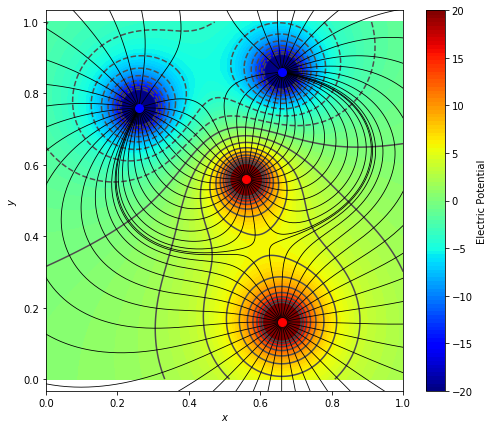

In [15]:
plt.figure(figsize=(8, 7),facecolor="w")
# plot field line
for x, y in zip(xs,ys):
    plt.plot(x, y, color="k",lw=0.8)

# plot point charges
for C in charges:
    if C.q>0:
        plt.plot(C.pos[0], C.pos[1], 'ro', ms=8*np.sqrt(C.q))
    if C.q<0:
        plt.plot(C.pos[0], C.pos[1], 'bo', ms=8*np.sqrt(-C.q))

# plot electric potential
clim0,clim1 = -20,20
vvs[np.where(vvs<clim0)] = clim0*0.999999 # to avoid error
vvs[np.where(vvs>clim1)] = clim1*0.999999 # to avoid error
plt.tricontour(xxs,yys,vvs,20,colors="0.3")
plt.tricontourf(xxs,yys,vvs,100,cmap=cm.jet)
cbar = plt.colorbar()
cbar.set_clim(clim0,clim1)
cbar.set_ticks(np.linspace(clim0,clim1,9))
cbar.set_label("Electric Potential")
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.axes().set_aspect('equal','datalim')
#plt.savefig('electric_field_line_wo_mayavi.png',dpi=250,bbox_inches="tight",pad_inches=0.02)
plt.show()